In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [6]:
df.describe()

,math score,reading score,writing score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [7]:
for i in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
    print(df[i].value_counts(dropna=False))
    print('\n')

female    518
male      482
Name: gender, dtype: int64


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


standard        645
free/reduced    355
Name: lunch, dtype: int64


none         642
completed    358
Name: test preparation course, dtype: int64




In [8]:
# Comparing scores based on gender
df.groupby('gender')[['math score','reading score','writing score']].agg(['count','min','max','mean']).round(2).T

gender               female    male
math score    count  518.00  482.00
              min      0.00   27.00
              max    100.00  100.00
              mean    63.63   68.73
reading score count  518.00  482.00
              min     17.00   23.00
              max    100.00  100.00
              mean    72.61   65.47
writing score count  518.00  482.00
              min     10.00   15.00
              max    100.00  100.00
              mean    72.47   63.31

By comparing mean scores we see that Male math scores are higher than Female math scores. In Reading and Writing Female scores are higher than Male scores.


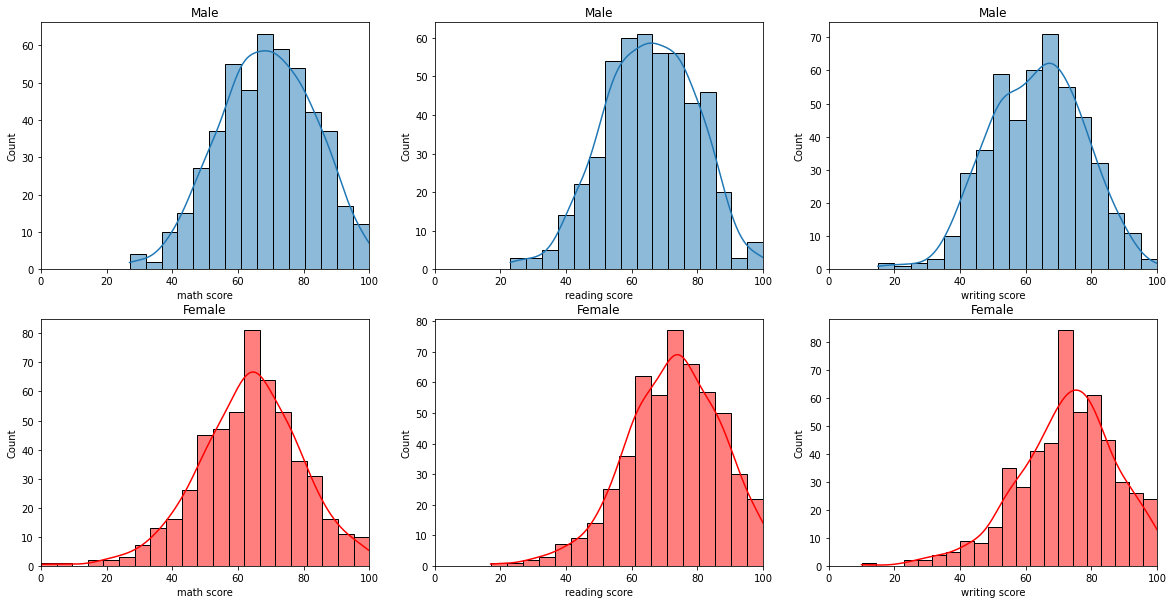

In [9]:
fig , axes = plt.subplots(2,3, figsize=(20,10))
sns.histplot(df[df['gender'] =='male']['math score'],kde=True,ax = axes[0][0])
sns.histplot(df[df['gender'] =='male']['reading score'],kde=True,ax = axes[0][1])
sns.histplot(df[df['gender'] =='male']['writing score'],kde=True,ax = axes[0][2])

sns.histplot(df[df['gender'] =='female']['math score'],kde=True,ax = axes[1][0],color='red')
sns.histplot(df[df['gender'] =='female']['reading score'],kde=True,ax = axes[1][1],color='red')
sns.histplot(df[df['gender'] =='female']['writing score'],kde=True,ax = axes[1][2],color='red')

for i in range(0,3):
    axes[0][i].set_title("Male")
    axes[1][i].set_title("Female")
    
    axes[0][i].set_xlim(0,100)
    axes[1][i].set_xlim(0,100)
plt.show()

In [10]:
# Comparing Scores of students based on their race/ethnicity
df.groupby('race/ethnicity')[['math score','reading score','writing score']].agg(['count','min','max','mean']).round(2).T

race/ethnicity       group A  group B  group C  group D  group E
math score    count    89.00   190.00   319.00   262.00   140.00
              min      28.00     8.00     0.00    26.00    30.00
              max     100.00    97.00    98.00   100.00   100.00
              mean     61.63    63.45    64.46    67.36    73.82
reading score count    89.00   190.00   319.00   262.00   140.00
              min      23.00    24.00    17.00    31.00    26.00
              max     100.00    97.00   100.00   100.00   100.00
              mean     64.67    67.35    69.10    70.03    73.03
writing score count    89.00   190.00   319.00   262.00   140.00
              min      19.00    15.00    10.00    32.00    22.00
              max      97.00    96.00   100.00   100.00   100.00
              mean     62.67    65.60    67.83    70.15    71.41

Group E has the best score in all the subjects and Group A has the worst score compared to other groups

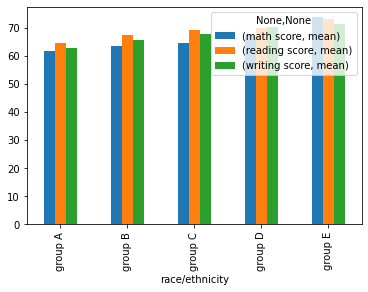

In [11]:
df.groupby('race/ethnicity')[['math score','reading score','writing score']].agg(['mean']).plot(kind ='bar')

In [12]:
# Effect of Parent's level of Education in student's score
df.groupby('parental level of education')[['math score','reading score','writing score']].agg(['count','min','max','mean']).round(2).T

parental level of education  associate's degree  bachelor's degree  \
math score    count                      222.00             118.00   
              min                         26.00              29.00   
              max                        100.00             100.00   
              mean                        67.88              69.39   
reading score count                      222.00             118.00   
              min                         31.00              41.00   
              max                        100.00             100.00   
              mean                        70.93              73.00   
writing score count                      222.00             118.00   
              min                         35.00              38.00   
              max                        100.00             100.00   
              mean                        69.90              73.38   

parental level of education  high school  master's degree  some college  \
math score    count               196.00            59.00        226.00   
              min                   8.00            40.00         19.00   
              max                  99.00            95.00        100.00   
              mean                 62.14            69.75         67.13   
reading score count               196.00            59.00        226.00   
              min                  24.00            42.00         23.00   
              max                  99.00           100.00        100.00   
              mean                 64.70            75.37         69.46   
writing score count               196.00            59.00        226.00   
              min                  15.00            46.00         19.00   
              max                 100.00           100.00         99.00   
              mean                 62.45            75.68         68.84   

parental level of education  some high school  
math score    count                    179.00  
              min                        0.00  
              max                       97.00  
              mean                      63.50  
reading score count                    179.00  
              min                       17.00  
              max                      100.00  
              mean                      66.94  
writing score count                    179.00  
              min                       10.00  
              max                      100.00  
              mean                      64.89

Students whose parents have a master's degree seem to perform the best

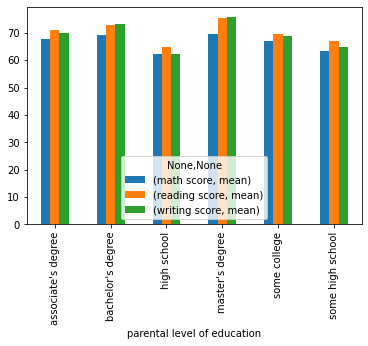

In [13]:
df.groupby('parental level of education')[['math score','reading score','writing score']].agg(['mean']).plot(kind ='bar')

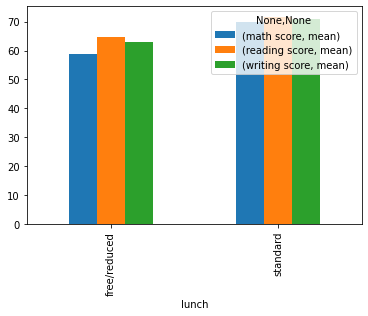

In [14]:
df.groupby('lunch')[['math score','reading score','writing score']].agg(['mean']).plot(kind ='bar')

In [15]:
df.groupby('lunch')[['math score','reading score','writing score']].agg(['count','min','max','mean']).round(2).T

lunch                free/reduced  standard
math score    count        355.00    645.00
              min            0.00     19.00
              max          100.00    100.00
              mean          58.92     70.03
reading score count        355.00    645.00
              min           17.00     26.00
              max          100.00    100.00
              mean          64.65     71.65
writing score count        355.00    645.00
              min           10.00     22.00
              max          100.00    100.00
              mean          63.02     70.82

In [22]:
numeric_data = [x for x in df.columns if df[x].dtype=="int64"]
categorical_data = [y for y in df.columns if df[y].dtype=="object"]
numeric_df = pd.DataFrame()
categorical_df = pd.DataFrame()
for i in numeric_data:
    numeric_df[i]=df[i]
for j in categorical_data:
    categorical_df[j] = df[j]

In [29]:
numeric_data

['math score', 'reading score', 'writing score', 'total_score']

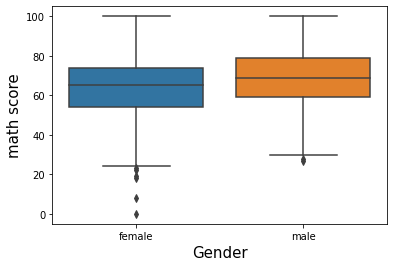

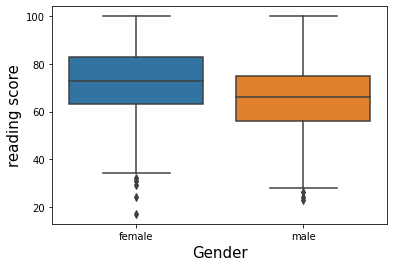

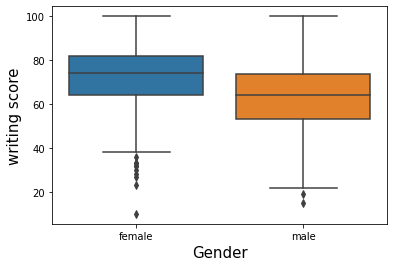

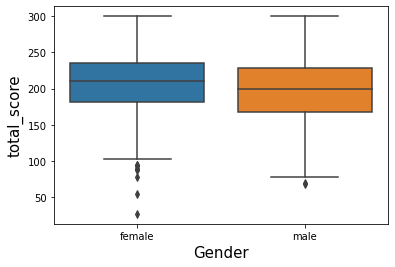

In [31]:
 for i in numeric_df:
    sns.boxplot(data=df, x= 'gender', y = i)
    plt.xlabel("Gender",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

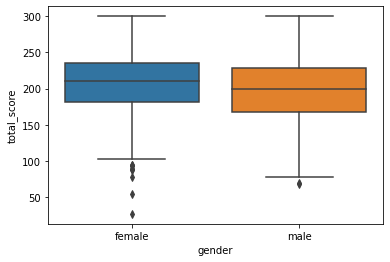

In [30]:
sns.boxplot(data=df, x='gender', y='total_score')


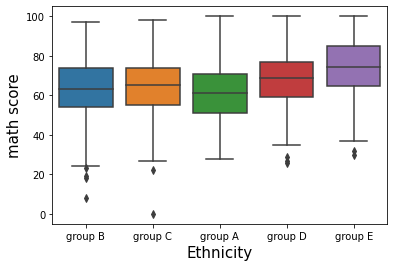

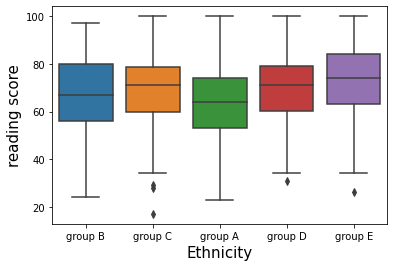

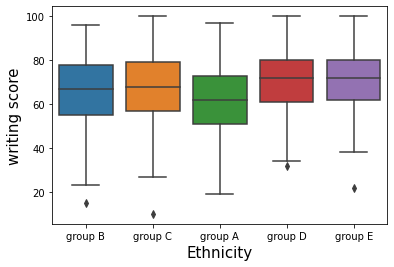

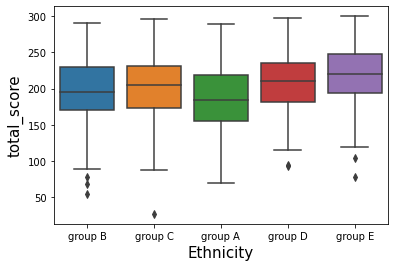

In [33]:
 for i in numeric_df:
    sns.boxplot(data=df, x = 'race/ethnicity', y = i)
    plt.xlabel("Ethnicity",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

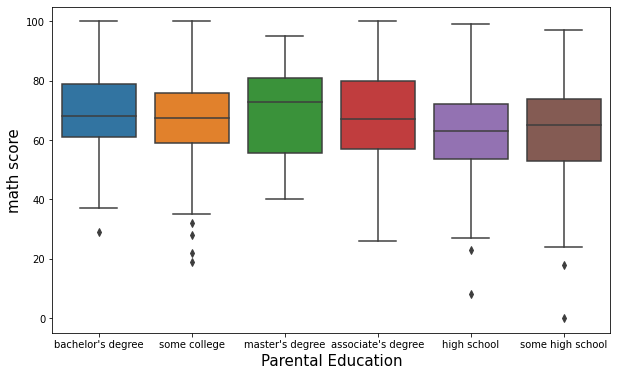

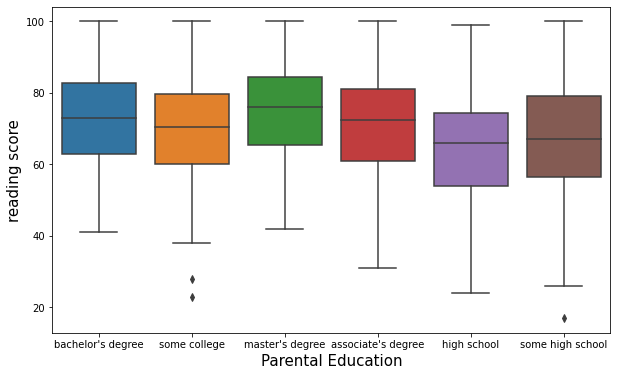

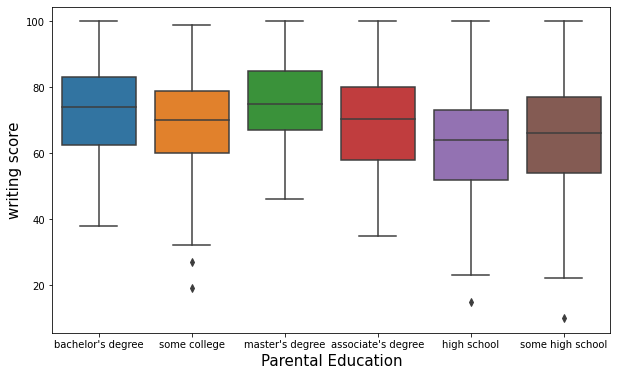

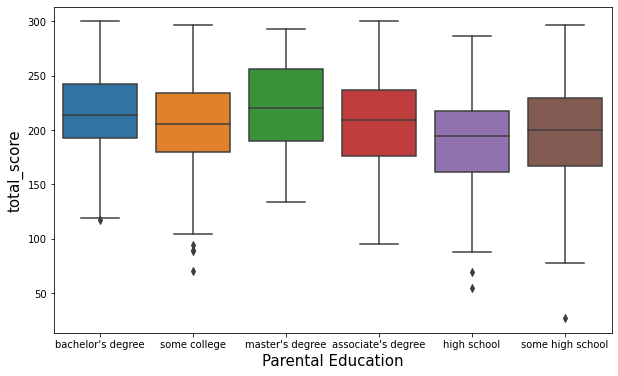

In [35]:
for i in numeric_df:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,x = 'parental level of education',y = i)
    plt.xlabel("Parental Education",fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()